# Toxic: TF-IDF/NMF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from wordcloud import WordCloud
from sklearn.manifold import TSNE

from time import time
import math

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
# df.head()

(159571, 30)


### Assumptions

In [3]:
df_t = df[df['rating']>0]
print(df_t.shape)

n_samples = 2000
n_features = 1000

model_list = ['LDA','NMF-FN','NMF-KL']
class_list = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

(16225, 30)


In [4]:
# Implementation based on http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def create_wordcloud(text,width,height,max_words,title):
    wordcloud = WordCloud(width=width,height=height,max_words=max_words).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title,fontweight='bold',fontsize=16)

def print_top_words(model, feature_names, n_top_words):
    listy = []
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        listy.append(message)
    return listy  

def tfidf_nmf_dict(dataset,model_list,class_list,ngram_range, max_iter,max_df,min_df,n_components,n_top_words,ncols):
    class_tfidfnmf = {}
    for item in class_list:
        if item == 'all':
            data = dataset
        else:
            data = dataset[dataset[item]==1]
        
        tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range,max_df=max_df, min_df=min_df,max_features=n_features,stop_words='english')
        tfidf = tfidf_vectorizer.fit_transform(data.comment_text_s)
        
        tf_vectorizer = CountVectorizer(ngram_range=ngram_range,max_df=max_df, min_df=min_df,max_features=n_features,stop_words='english')
        tf = tf_vectorizer.fit_transform(data.comment_text_s)
        
        nmf = NMF(n_components=n_components, random_state=1,alpha=.1, l1_ratio=.5).fit(tfidf)
        
        tfidf_feature_names = tfidf_vectorizer.get_feature_names()

        aa = print_top_words(nmf, tfidf_feature_names, n_top_words)
        
        nmf = NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', 
                  max_iter=max_iter, alpha=.1,l1_ratio=.5).fit(tfidf)
        
        tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    
        bb = print_top_words(nmf, tfidf_feature_names, n_top_words)
        
        lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,learning_method='online',
                                        learning_offset=50.,random_state=0)
        lda.fit(tf)
        
        tf_feature_names = tf_vectorizer.get_feature_names()
        
        cc = print_top_words(lda, tf_feature_names, n_top_words)
        class_tfidfnmf[item] = {'NMF-FN':aa, 'NMF-KL':bb, 'LDA':cc}
        # plot wordclouds
        for e in class_tfidfnmf[item]:
            fig = plt.figure(figsize=(20,20))
            chart_tot = n_components * len(class_list) * len(model_list)
            ncols = ncols
            nrows = math.ceil(chart_tot / ncols)
            for i in range(n_components):
                ax = fig.add_subplot(nrows,ncols,i+1)
                data = ' '.join(class_tfidfnmf[item][e][i].split()[2:])
                title = "Topic: " + str(item) + "_" + str(e) + "_" + "_" + str(i)
                create_wordcloud(data,400,200,200,title)
                fig.tight_layout()
            filepath = '../charts/tfidfnmflda_wc1' + str(item) + str(e)
            plt.savefig(filepath)
            print('saved at ' + filepath)

    return class_tfidfnmf

saved at ../charts/tfidfnmflda_wc1allNMF-FN
saved at ../charts/tfidfnmflda_wc1allNMF-KL
saved at ../charts/tfidfnmflda_wc1allLDA


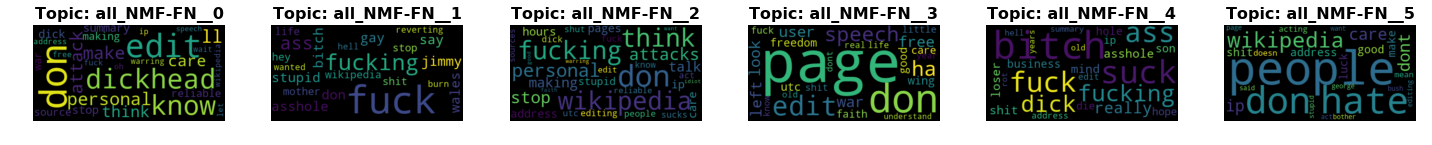

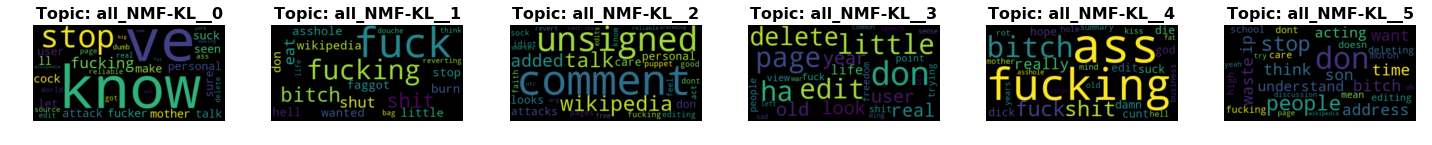

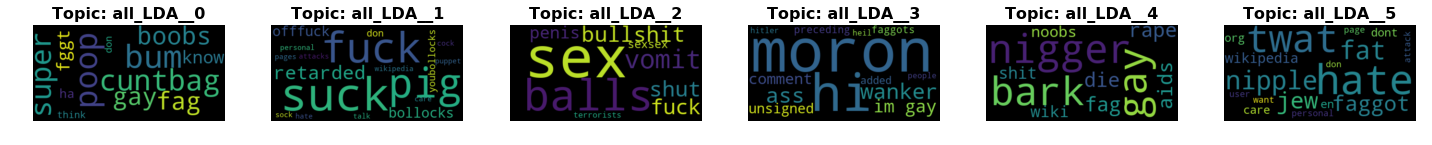

In [5]:
# inputs: dataset,model_list,class_list,ngram_range, max_iter,max_df,min_df,n_components,n_top_words,ncols
ctnd0 = tfidf_nmf_dict(df_t,model_list,['all'],(2,3),100000,.01,1,6,20,6)

saved at ../charts/tfidfnmflda_wc1toxicNMF-FN
saved at ../charts/tfidfnmflda_wc1toxicNMF-KL
saved at ../charts/tfidfnmflda_wc1toxicLDA
saved at ../charts/tfidfnmflda_wc1severe_toxicNMF-FN
saved at ../charts/tfidfnmflda_wc1severe_toxicNMF-KL
saved at ../charts/tfidfnmflda_wc1severe_toxicLDA
saved at ../charts/tfidfnmflda_wc1obsceneNMF-FN
saved at ../charts/tfidfnmflda_wc1obsceneNMF-KL
saved at ../charts/tfidfnmflda_wc1obsceneLDA
saved at ../charts/tfidfnmflda_wc1threatNMF-FN
saved at ../charts/tfidfnmflda_wc1threatNMF-KL
saved at ../charts/tfidfnmflda_wc1threatLDA
saved at ../charts/tfidfnmflda_wc1insultNMF-FN
saved at ../charts/tfidfnmflda_wc1insultNMF-KL
saved at ../charts/tfidfnmflda_wc1insultLDA
saved at ../charts/tfidfnmflda_wc1identity_hateNMF-FN
saved at ../charts/tfidfnmflda_wc1identity_hateNMF-KL
saved at ../charts/tfidfnmflda_wc1identity_hateLDA


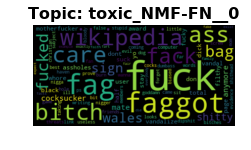

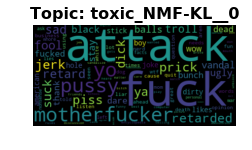

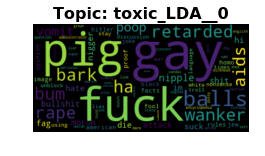

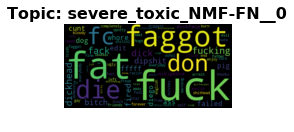

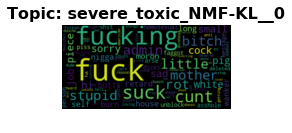

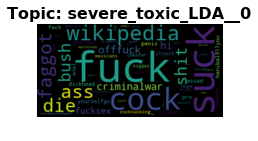

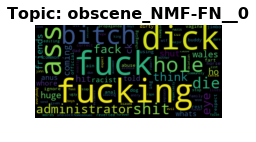

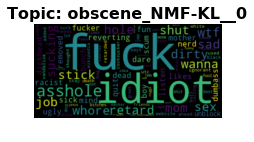

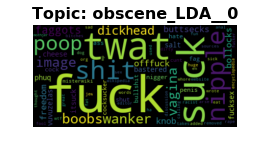

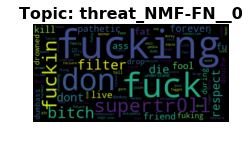

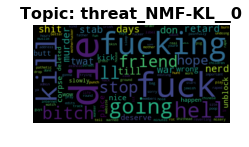

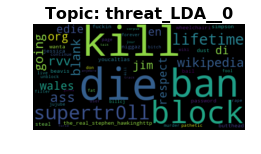

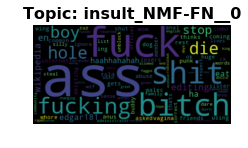

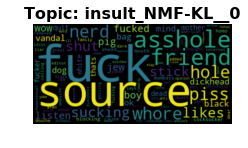

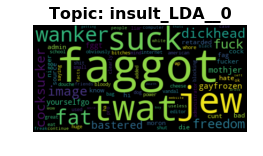

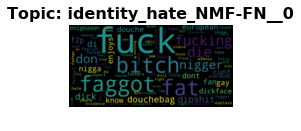

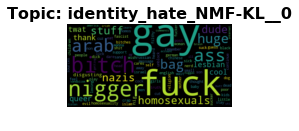

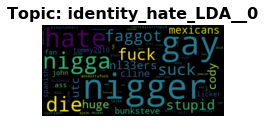

In [6]:
ctnd0 = tfidf_nmf_dict(df_t,model_list,class_list,(1,2),100000,.01,1,1,100,6)

In [7]:
# ctnd1 = tfidf_nmf_dict(df_t,model_list,['all'],1000000,6,20)

In [8]:
# ' '.join(ctnd0['all']['LDA'][0].split()[2:])

In [9]:
# ctnd2 = tfidf_nmf_dict(df_t,model_list,class_list,(1,1),1000,1,20)

In [10]:
# ctnd2 = tfidf_nmf_dict(df_t,model_list,class_list,10000,1,20)